In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.animation import FuncAnimation
import pyarma as arma
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator

from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)

path = 'prob8_u_cube_double'
u_cube = arma.cx_cube()
u_cube.load(path)

True

In [2]:
def z(cx_cube, t, out):

    # Get the value at the specified indices
    u_slice = cx_cube[arma.single_slice, t]
    
    u_mat = arma.cx_mat(u_slice)
    
    
    # Return the value as a complex number
    if out== "prob":
        return arma.real(u_slice @ arma.conj(u_slice))
    if out == "real":
        return arma.real(u_slice)
    if out == "imag":
        return arma.imag(u_slice)

In [3]:
print(z(u_cube,1, "prob").min(), z(u_cube,1, "prob").max())
print(z(u_cube,1, "prob").n_cols, z(u_cube,1, "prob").n_rows)

1.3287757257573415e-93 0.0007950211084995772
199 199


In [4]:
# Fill z_data_list with f(x,y,t)
z_data_prob_list = []
for t in range(u_cube.n_slices):
    z_data = z(u_cube, t, "prob")
    z_data_prob_list.append(z_data)
    
# Fill z_data_list with f(x,y,t)
z_data_real_list = []
for t in range(u_cube.n_slices):
    z_data = z(u_cube, t, "real")
    z_data_real_list.append(z_data)
    
z_data_imag_list = []
for t in range(u_cube.n_slices):
    z_data = z(u_cube, t, "imag")
    z_data_imag_list.append(z_data)

In [29]:
def make_3image( colormap, clr_reversed, out):  
    # Set up a 2D xy grid
    h = 0.005
    x_points = np.arange(0, 1, h)
    y_points = np.arange(0, 1, h)
    x, y = np.meshgrid(x_points, y_points, sparse=True)

    # Array of time points
    T = 0.002
    dt = 2.5e-5
    t_points = np.arange(0, T, dt)

    #
    # Now the list z_data_list contains a series of "frames" of z(x,y,t), 
    # where each frame can be plotted as a 2D image using imshow. Let's
    # animate it!
    #
    if out == "real":
        z_data = z_data_real_list
    if out == "imag":
        z_data = z_data_imag_list
    if out == "prob":
        z_data = z_data_prob_list
    if out == "ReIm":
        z_data = z_data_imag_list
        z_data2 = z_data_real_list
        
        data20 = z_data2[0]
        data21 = z_data2[40]
        data22 = z_data2[80]
        
    data0 = z_data[0]
    data1 = z_data[40]
    data2 = z_data[80]
    

    # Some settings
    fontsize = 16
    t_min = t_points[0]
    x_min, x_max = x_points[0], x_points[-1]
    y_min, y_max = y_points[0], y_points[-1]

    # Create figure
    fig = plt.figure(figsize = (10,4))
    gs1 = gridspec.GridSpec(1, 3, wspace=0.0, hspace=0.0)
    

    #axs = plt.subplots(gs1[0],gs1[1], sharey=False)

    axs = [plt.subplot(gs1[0]), plt.subplot(gs1[1]), plt.subplot(gs1[2])]
    ax = axs[0]
    #ax.set_aspect("auto")
    #axs[1].text(0.95, 0.95, f"t = {t_min + 0 * dt}", color="white",
    #            horizontalalignment="right", verticalalignment="top", fontsize=fontsize,transform=ax.transAxes)
    # Create a colour scale normalization according to the max z value in the first frame
    norm = matplotlib.cm.colors.Normalize(vmin=data0.min(), vmax=data0.max())

    # Plot the first img
    if out == "ReIm":
        img = ax.imshow(data0, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap("hot"), norm=norm, alpha=1)
        img = ax.imshow(data20, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap("bone"), norm=norm, alpha=0.5)
    
    else:
        if clr_reversed:
            img = ax.imshow(data0, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap(colormap).reversed(), norm=norm)
        else:
            img = ax.imshow(data0, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap(colormap), norm=norm,)

    
        
    # Axis labels
    ax.set_xlabel("x", fontsize=fontsize)
    ax.set_ylabel("y", fontsize=fontsize)
    #ax.set_xticks(x_points)
    
    # Add a colourbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.0)
    #cax.set_yticks([])
   
    cbar = plt.colorbar(img, cax=cax)
    cbar.set_ticks([])
    
    # Add a text element showing the time    
    ax.text(0.95, 0.95, f"t = {t_min + 0 * dt}", color="white",
            horizontalalignment="right", verticalalignment="top", fontsize=fontsize)
    
    # Plot the second img    
    ax = axs[1]
    #ax.set_aspect("auto")
    if out == "ReIm":
        img = ax.imshow(data1, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap("hot"), norm=norm, alpha=1)
        img = ax.imshow(data21, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap("bone"), norm=norm, alpha=0.5)
    
    else:
        if clr_reversed:
            img = ax.imshow(data1, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap(colormap).reversed(), norm=norm)
        else:
            img = ax.imshow(data1, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap(colormap), norm=norm)
    
    # Axis labels
    ax.set_xlabel("x", fontsize=fontsize)
    ax.set_yticks([])

    
    # Add a colourbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.0)   
    cbar = plt.colorbar(img, cax=cax)
    cbar.set_ticks([])
    
    ax.text(0.95, 0.95, f"t = {t_min + 40 * dt}", color="white",
            horizontalalignment="right", verticalalignment="top", fontsize=fontsize)
    
    # Plot the third img    
    ax = axs[2]
    #ax.set_aspect("auto")
    if out == "ReIm":
        img = ax.imshow(data2, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap("pink"), norm=norm, alpha=1)
        img = ax.imshow(data22, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap("pink"), norm=norm, alpha=0.5)
    
    else:
        if clr_reversed:
            img = ax.imshow(data2, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap(colormap).reversed(), norm=norm)
        else:
            img = ax.imshow(data2, extent=[x_min,x_max,y_min,y_max], cmap=plt.get_cmap(colormap), norm=norm)

    # Add a text element showing the time
    ax.text(0.95, 0.95, f"t = {t_min + 80 * dt}", color="white",
                horizontalalignment="right", verticalalignment="top", fontsize=fontsize,transform=ax.transAxes)

    
    # Axis labels
    ax.set_xlabel("x", fontsize=fontsize)
    ax.set_yticks([])
    
    # Add a colourbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0)
    if out == "prob":  
        cbar = plt.colorbar(img, cax=cax)
        cbar.set_label("p(x,y)", fontsize=fontsize)
    if out == "imag":   
        cbar = plt.colorbar(img, cax=cax)
        cbar.set_label("Im(u)", fontsize=fontsize)        
    if out == "real":        
        cbar = plt.colorbar(img, cax=cax)
        cbar.set_label("Re(u)", fontsize=fontsize)

        
    font = {'size'   : 13,
            'style': 'normal',
            'variant': 'normal'}
    plt.rc('font', **font)
    

    return img




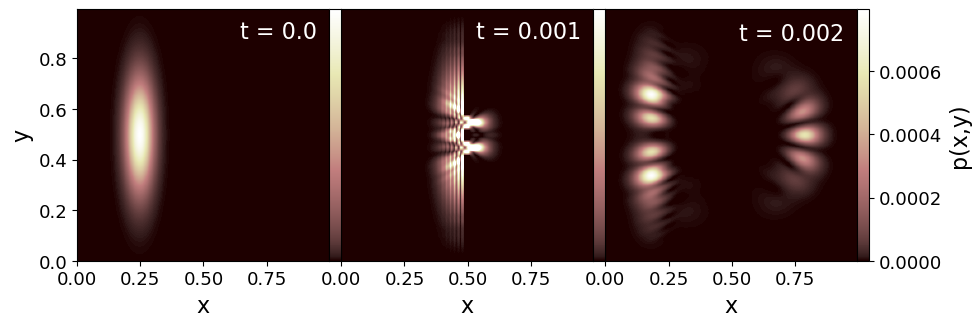

In [35]:
make_3image("pink", False, "prob")
plt.tight_layout()
plt.savefig('p8_3img_prob.pdf')
plt.show()

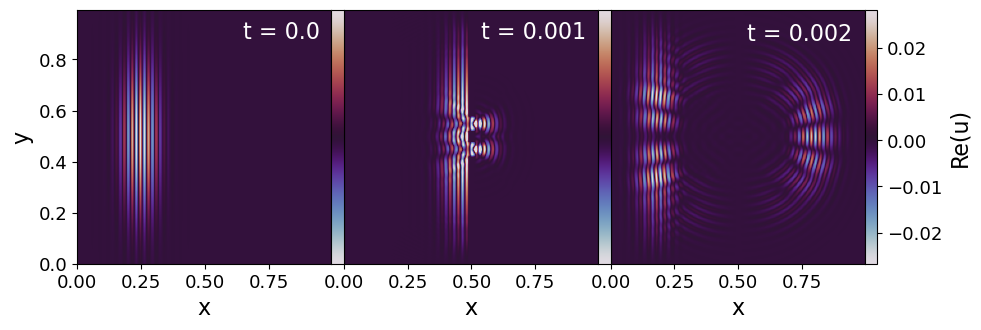

In [33]:
make_3image("twilight", False, "real")
plt.tight_layout()
plt.savefig('p8_3img_real.pdf')
plt.show()

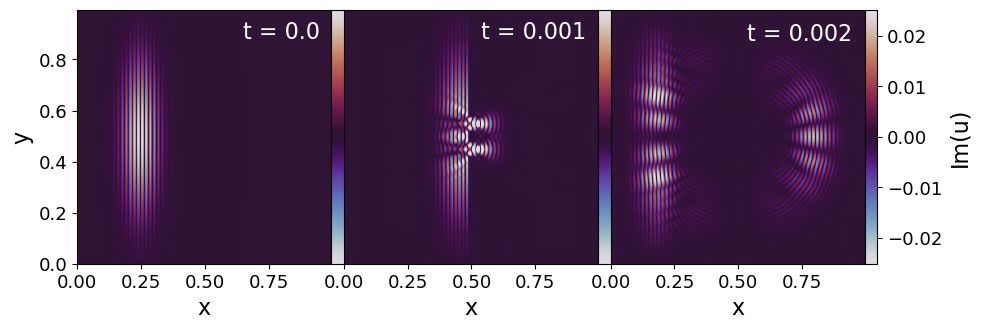

In [34]:
make_3image("twilight", False, "imag")
plt.tight_layout()
plt.savefig('p8_3img_imag.pdf')
plt.show()

In [49]:
def make_image2(i):  

    # Create figure
    fig = plt.figure()
    ax = plt.gca()
    
    ax.set_axis_off()
    
    img_data = np.matrix(z_data_prob_list[i])[20:180,40:160]
    
    print(img_data)
    
    extent = 50, 150, 60, 140
    # Plot the first frame
    plt.imshow(img_data, interpolation='spline16', extent = extent,cmap=plt.get_cmap("pink"))

    # Normalize the colour scale to the current frame?
    norm = matplotlib.cm.colors.Normalize(vmin=img_data.min(), vmax=img_data.max()*0.7)
    

[[2.36030599e-10 5.27598027e-10 8.72306736e-10 ... 6.90911405e-19
  7.15751359e-19 5.24817148e-19]
 [3.19265639e-10 5.41089664e-10 7.91420682e-10 ... 7.89006382e-19
  7.59127770e-19 5.29552674e-19]
 [3.30625050e-10 5.02848566e-10 1.00585529e-09 ... 7.67593809e-19
  6.96771646e-19 4.71111956e-19]
 ...
 [3.19265639e-10 5.41089664e-10 7.91420682e-10 ... 7.89006382e-19
  7.59127770e-19 5.29552674e-19]
 [2.36030599e-10 5.27598027e-10 8.72306736e-10 ... 6.90911405e-19
  7.15751359e-19 5.24817148e-19]
 [2.51192776e-10 3.69544207e-10 8.54359604e-10 ... 5.59256118e-19
  6.18879797e-19 4.75066926e-19]]


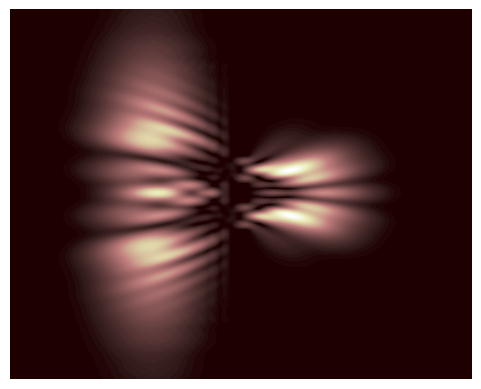

In [52]:
make_image2(50)
plt.savefig('introimg_double.pdf')
plt.show()